In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('popular_anime.csv')

#  Clean genres → list
df['genres'] = df['genres'].str.split(',')

# Strip whitespace from genre names
df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else x)

df['year'] = pd.to_datetime(df['aired_from'], errors='coerce').dt.year

df = df.explode('genres')

# Group + Count (top 3 genres from 2011 to 2024)
top_genres_by_year = (
    df[(df['year'] > 2000) & (df['year'] < 2025)].groupby(['year', 'genres'])
    .size()
    .reset_index(name='count')
    .sort_values(['year', 'count'], ascending=[True, False])
    .groupby('year')
    .head(3)  
)

top_genres_by_year


,year,genres,count
5,2001.0,Comedy,106
1,2001.0,Adventure,89
9,2001.0,Fantasy,85
26,2002.0,Comedy,130
36,2002.0,Sci-Fi,98
...,...,...,...
454,2023.0,Action,308
459,2023.0,Comedy,272
483,2024.0,Fantasy,364
474,2024.0,Action,317


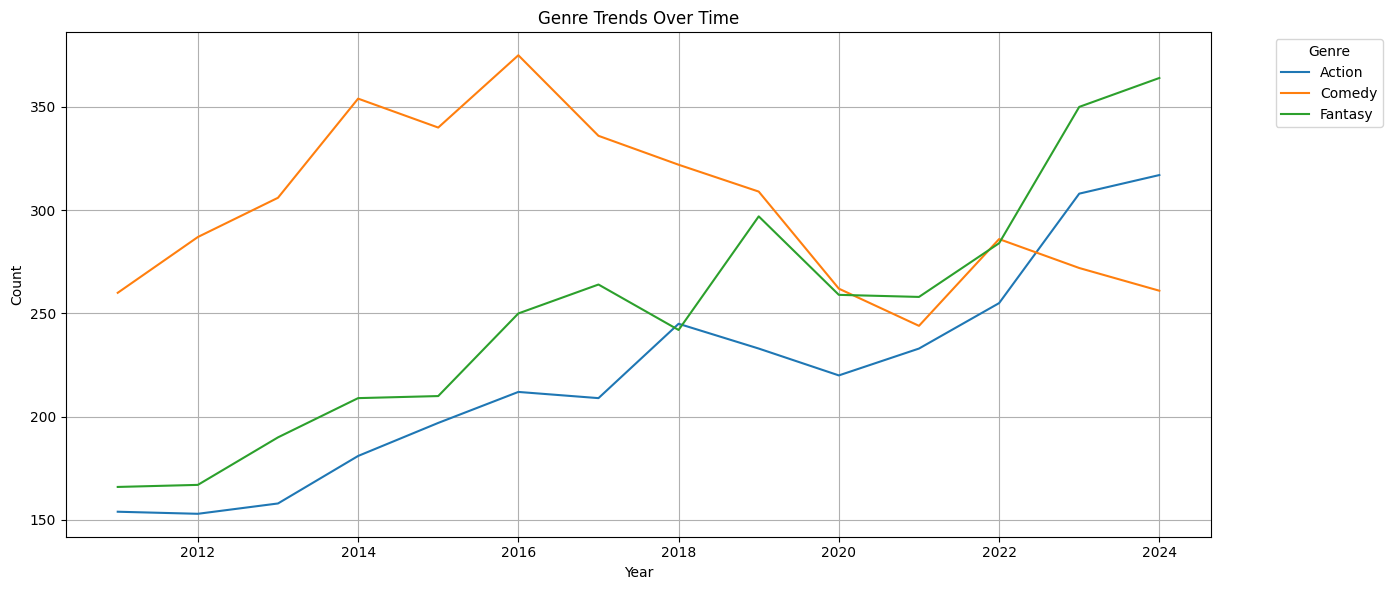

In [ ]:
# 🧃 Filter one genre
targetyears= top_genres_by_year[(top_genres_by_year['year'] > 2010) & (top_genres_by_year['year'] < 2025)]

pivot = targetyears.pivot(index='year', columns='genres', values='count')

# Plot genres as lines
pivot.plot(kind='line', figsize=(14, 6), title='Anime Genre Trends Over Time')

plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # push legend outside
plt.tight_layout()
plt.show()
